# XGBoost

* 트리 기반의 앙상블 기법
* 분류에 있어서 다른 알고리즘보다 좋은 예측 성능을 보여줌
* XGBoost는 GBM 기반이지만, GBM의 단점인 느린 수행 시간과 과적합 규제 부재 등의 문제를 해결
* 병렬 CPU 환경에서 빠르게 학습 가능

In [2]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

/var/folders/24/h6r1lsxx1k1gcpbs79bpj3m80000gn/T/ipykernel_70387/3611095207.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


## 파이썬 기반 XGBoost

In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2)
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [5]:
params = {
    'max_depth':3,
    'eta':0.1,
    'objective':'binary:logistic',
    'eval_metric':'logloss',
    'early_stopping':100
}
num_rounds = 400

In [8]:
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=evals)

[21:49:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1667849614592/work/src/learner.cc:767: 
Parameters: { "early_stopping" } are not used.

[0]	train-logloss:0.61059	eval-logloss:0.61559
[1]	train-logloss:0.54177	eval-logloss:0.54941
[2]	train-logloss:0.48446	eval-logloss:0.49628
[3]	train-logloss:0.43591	eval-logloss:0.45245
[4]	train-logloss:0.39350	eval-logloss:0.41289
[5]	train-logloss:0.35545	eval-logloss:0.37791
[6]	train-logloss:0.32354	eval-logloss:0.35094
[7]	train-logloss:0.29476	eval-logloss:0.32481
[8]	train-logloss:0.27007	eval-logloss:0.30239
[9]	train-logloss:0.24736	eval-logloss:0.28274
[10]	train-logloss:0.22727	eval-logloss:0.26393
[11]	train-logloss:0.20886	eval-logloss:0.24759
[12]	train-logloss:0.19253	eval-logloss:0.23415
[13]	train-logloss:0.17848	eval-logloss:0.22259
[14]	train-logloss:0.16483	eval-logloss:0.21110
[15]	train-logloss:0.15339	eval-logloss:0.20042
[16]	train-logloss:0.14331	eval-logloss:0.19301
[17]	train-logloss:0.13345	eval-loglo

In [9]:
predicts = xgb_model.predict(dtest)
print(np.round(predicts[:10], 3))

[0.998 0.995 0.996 0.    0.001 0.991 1.    0.461 0.995 1.   ]


In [10]:
preds = [1 if x > 0.5 else 0 for x in predicts]
print(preds[:10])

[1, 1, 1, 0, 0, 1, 1, 0, 1, 1]


In [11]:
print("정확도: {}".format(accuracy_score(y_test, preds))) 
print("정밀도: {}".format(precision_score(y_test, preds))) 
print("재현율: {}".format(recall_score(y_test, preds)))

정확도: 0.9473684210526315
정밀도: 0.9342105263157895
재현율: 0.9861111111111112


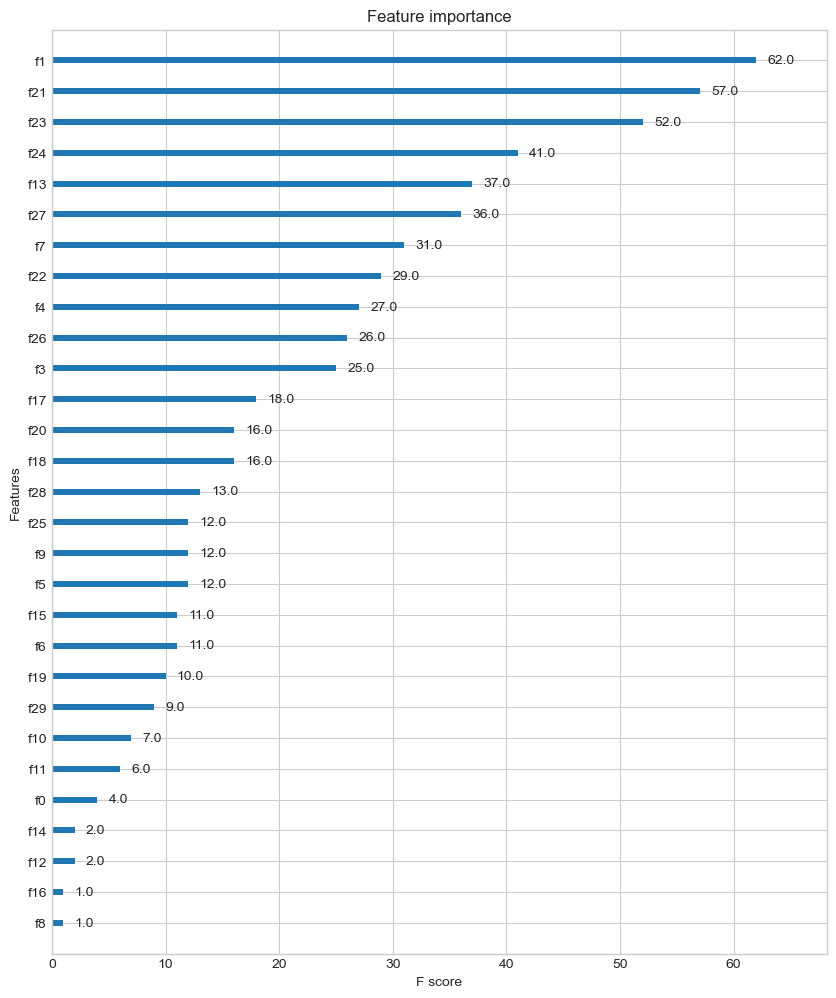

In [12]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax);

## XGBClassifier

### 붓꽃 데이터

In [13]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=1231)

In [14]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:, 1]

In [15]:
cross_val = cross_validate(
    estimator=xgbc,
    X=iris.data, y=iris.target,
cv=5 )
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.36508989334106445 (+/- 0.0475116003669758)
avg score time: 0.0015710353851318359 (+/- 0.0006496523067126771)
avg test score: 0.96 (+/- 0.024944382578492935)


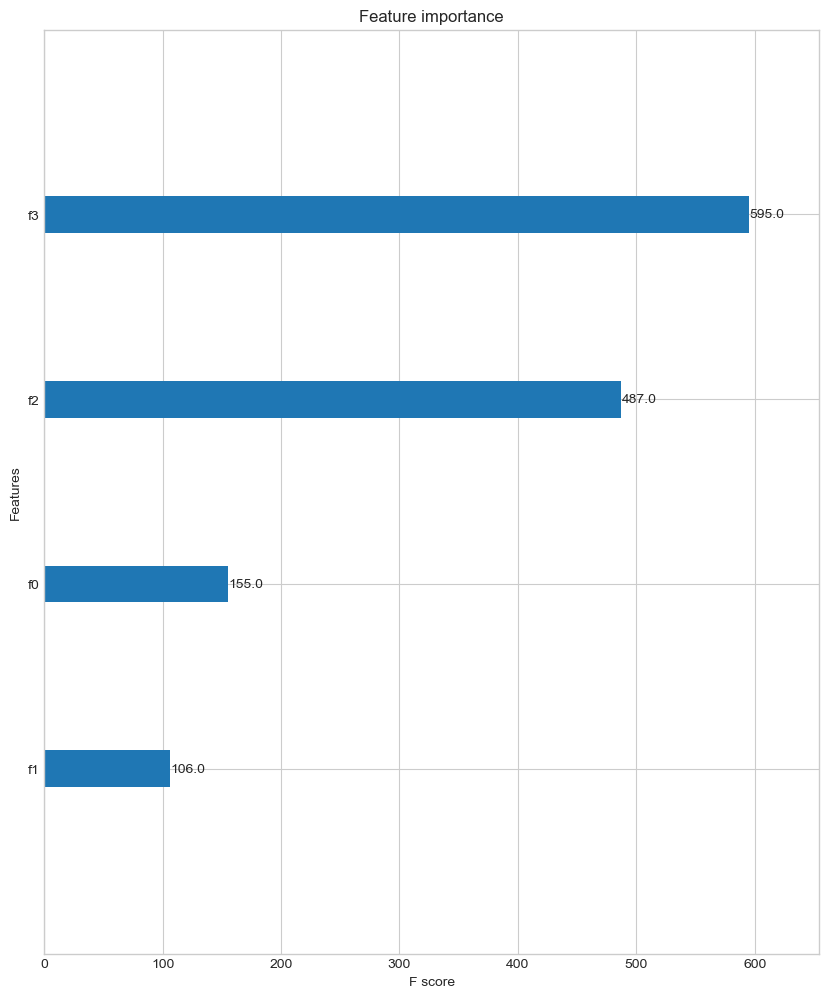

In [16]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax);

### 와인 데이터

In [19]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=1231)

In [20]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:, 1]

In [21]:
cross_val = cross_validate(
    estimator=xgbc,
    X=wine.data, y=wine.target,
cv=5 )
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.12127923965454102 (+/- 0.014688255273076834)
avg score time: 0.001139354705810547 (+/- 0.00030241730602381233)
avg test score: 0.9609523809523809 (+/- 0.028267341226138717)


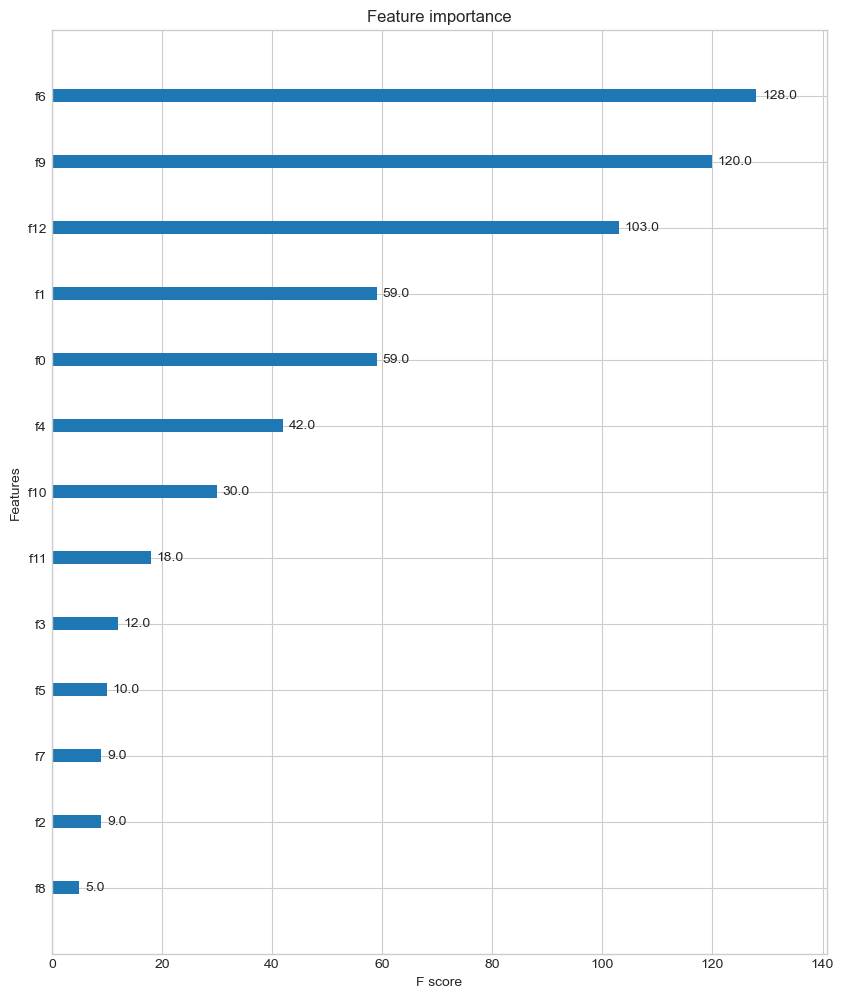

In [22]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax);

### 유방암 데이터

In [23]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=1231)

In [24]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:, 1]

In [26]:
cross_val = cross_validate(
    estimator=xgbc,
    X=cancer.data, y=cancer.target,
cv=5 )
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2547776222229004 (+/- 0.05198207111407663)
avg score time: 0.0014109611511230469 (+/- 0.00044688330307294193)
avg test score: 0.9736376339077782 (+/- 0.009609619188189153)


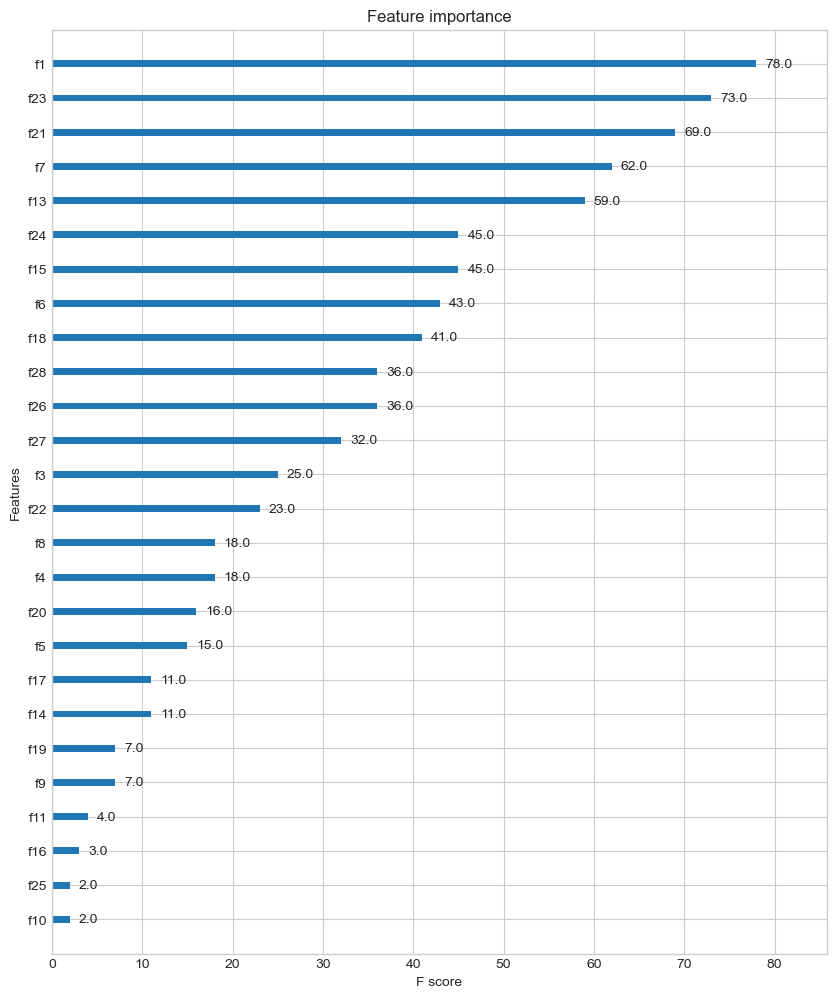

In [27]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax);

## XGBRegressor

### 당뇨병 데이터

In [28]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2)

In [30]:
xgbr = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, objective ='reg:squarederror')
xgbr.fit(X_train, y_train)
preds = xgbr.predict(X_test)

In [31]:
cross_val = cross_validate(
    estimator=xgbr,
    X=diabetes.data, y=diabetes.target,
cv=5 )
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.25080347061157227 (+/- 0.05380023671280341)
avg score time: 0.001010560989379883 (+/- 0.00016700172970007584)
avg test score: 0.2998837790950602 (+/- 0.07527155614299372)


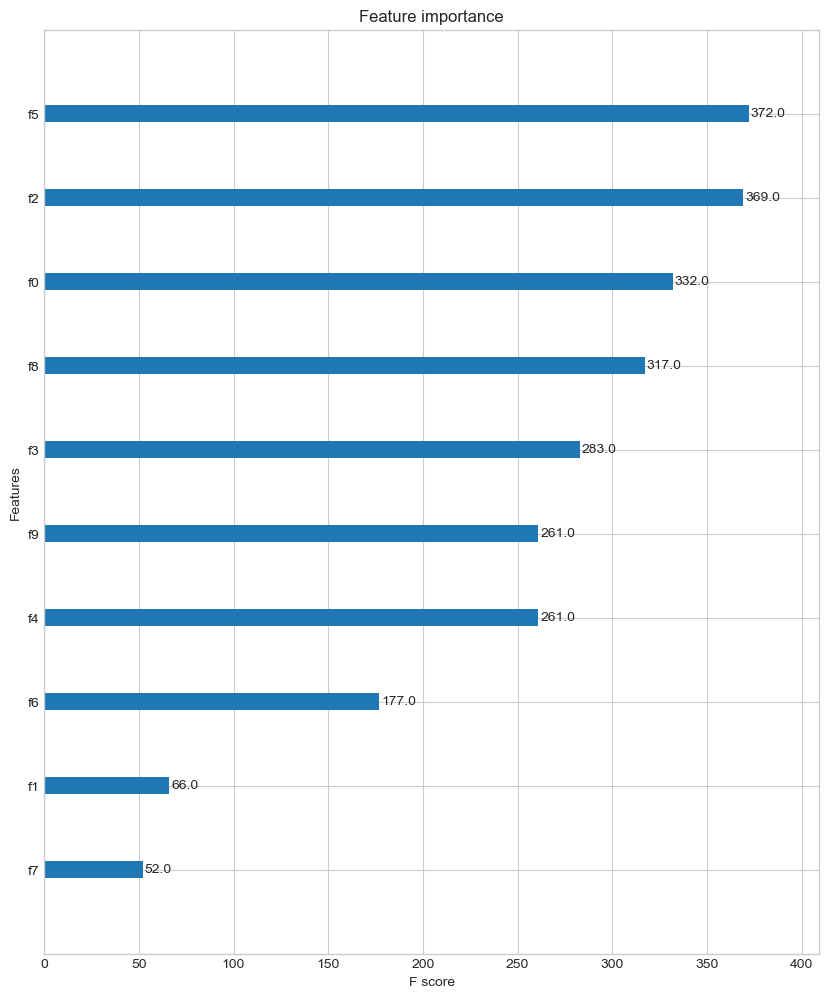

In [32]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbr, ax=ax);

# LightGBM

* 빠른 학습과 예측 시간
* 더 적은 메모리 사용
* 범주형 특징의 자동 변환과 최적 분할

In [33]:
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

## LGBMClassifier

### 붓꽃 데이터

In [34]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=1231)

In [41]:
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=1)
preds = lgbmc.predict(X_test)

[1]	valid_0's multi_logloss: 0.95708
[2]	valid_0's multi_logloss: 0.825713
[3]	valid_0's multi_logloss: 0.716726
[4]	valid_0's multi_logloss: 0.632661
[5]	valid_0's multi_logloss: 0.563686
[6]	valid_0's multi_logloss: 0.505967
[7]	valid_0's multi_logloss: 0.453106
[8]	valid_0's multi_logloss: 0.411576
[9]	valid_0's multi_logloss: 0.377418
[10]	valid_0's multi_logloss: 0.34351
[11]	valid_0's multi_logloss: 0.321711
[12]	valid_0's multi_logloss: 0.296059
[13]	valid_0's multi_logloss: 0.276797
[14]	valid_0's multi_logloss: 0.260805
[15]	valid_0's multi_logloss: 0.246982
[16]	valid_0's multi_logloss: 0.235806
[17]	valid_0's multi_logloss: 0.224756
[18]	valid_0's multi_logloss: 0.215545
[19]	valid_0's multi_logloss: 0.208875
[20]	valid_0's multi_logloss: 0.203057
[21]	valid_0's multi_logloss: 0.198775
[22]	valid_0's multi_logloss: 0.196396
[23]	valid_0's multi_logloss: 0.192285
[24]	valid_0's multi_logloss: 0.189974
[25]	valid_0's multi_logloss: 0.189199
[26]	valid_0's multi_logloss: 0.1900

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [36]:
cross_val = cross_validate(
    estimator=lgbmc,
    X=iris.data, y=iris.target,
cv=5 )
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.3619818687438965 (+/- 0.04124290340812675)
avg score time: 0.0009117603302001953 (+/- 0.00027999638373210286)
avg test score: 0.9600000000000002 (+/- 0.04898979485566355)


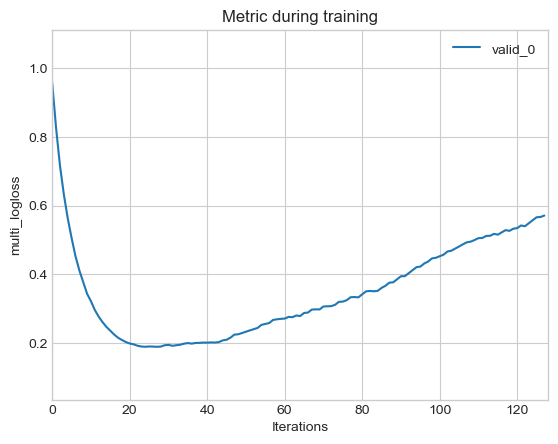

In [37]:
plot_metric(lgbmc);

### 와인 데이터

In [ ]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=1231)

In [39]:
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=1)
preds = lgbmc.predict(X_test)

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's multi_logloss: 0.95708
[2]	valid_0's multi_logloss: 0.825713
[3]	valid_0's multi_logloss: 0.716726
[4]	valid_0's multi_logloss: 0.632661
[5]	valid_0's multi_logloss: 0.563686
[6]	valid_0's multi_logloss: 0.505967
[7]	valid_0's multi_logloss: 0.453106
[8]	valid_0's multi_logloss: 0.411576
[9]	valid_0's multi_logloss: 0.377418
[10]	valid_0's multi_logloss: 0.34351
[11]	valid_0's multi_logloss: 0.321711
[12]	valid_0's multi_logloss: 0.296059
[13]	valid_0's multi_logloss: 0.276797
[14]	valid_0's multi_logloss: 0.260805
[15]	valid_0's multi_logloss: 0.246982
[16]	valid_0's multi_logloss: 0.235806
[17]	valid_0's multi_logloss: 0.224756
[18]	valid_0's multi_logloss: 0.215545
[19]	valid_0's multi_logloss: 0.208875
[20]	valid_0's multi_logloss: 0.203057
[21]	valid_0's multi_logloss: 0.198775
[22]	valid_0's multi_logloss: 0.196396
[23]	valid_0's multi_logloss: 0.192285
[24]	valid_0's multi_logloss: 0.189974
[25]	valid_0's multi_logloss: 0.189199
[26]	valid_0's multi_logloss: 0.1900

In [43]:
cross_val = cross_validate(
    estimator=lgbmc,
    X=wine.data, y=wine.target,
cv=5 )
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.3153493404388428 (+/- 0.03878018831745136)
avg score time: 0.0010141372680664063 (+/- 0.0005582927597367456)
avg test score: 0.9776190476190475 (+/- 0.01119469694127331)


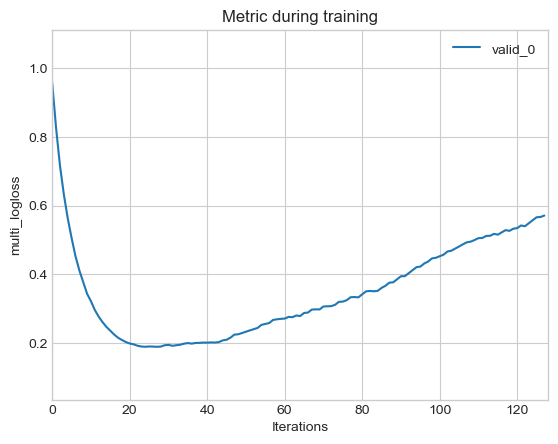

In [44]:
plot_metric(lgbmc);

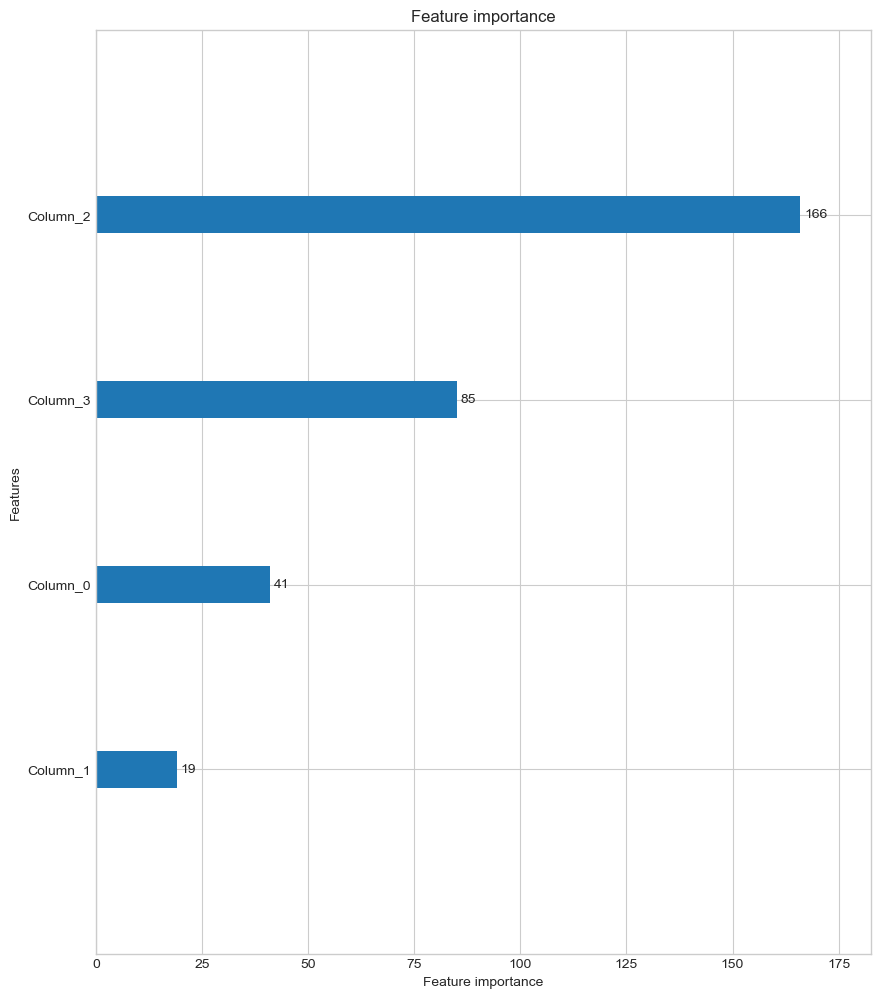

In [45]:
plot_importance(lgbmc, figsize=(10, 12));

## LGBMRegressor

### 당뇨병 데이터

In [46]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2)

In [47]:
lgbmr = LGBMRegressor(n_estimators=400)
evals = [(X_test, y_test)]
lgbmr.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=1)
preds = lgbmr.predict(X_test)

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 4924.03
[2]	valid_0's l2: 4575.84
[3]	valid_0's l2: 4317.2
[4]	valid_0's l2: 4123.49
[5]	valid_0's l2: 3937.44
[6]	valid_0's l2: 3803.79
[7]	valid_0's l2: 3710.15
[8]	valid_0's l2: 3622.58
[9]	valid_0's l2: 3581.12
[10]	valid_0's l2: 3513.8
[11]	valid_0's l2: 3449.93
[12]	valid_0's l2: 3441.43
[13]	valid_0's l2: 3439.04
[14]	valid_0's l2: 3447.86
[15]	valid_0's l2: 3437.37
[16]	valid_0's l2: 3479.08
[17]	valid_0's l2: 3457.84
[18]	valid_0's l2: 3434.05
[19]	valid_0's l2: 3455.97
[20]	valid_0's l2: 3462.39
[21]	valid_0's l2: 3470.88
[22]	valid_0's l2: 3524.23
[23]	valid_0's l2: 3529.23
[24]	valid_0's l2: 3577.19
[25]	valid_0's l2: 3586.39
[26]	valid_0's l2: 3609.6
[27]	valid_0's l2: 3615.77
[28]	valid_0's l2: 3610.39
[29]	valid_0's l2: 3638.67
[30]	valid_0's l2: 3654.72
[31]	valid_0's l2: 3689.05
[32]	valid_0's l2: 3703.76
[33]	valid_0's l2: 3750.44
[34]	valid_0's l2: 3756.53
[35]	valid_0's l2: 3812.26
[36]	valid_0's l2: 3864.63
[37]	valid_0's l2: 3867.19
[38]	valid_0'

In [48]:
cross_val = cross_validate(
    estimator=lgbmr,
    X=diabetes.data, y=diabetes.target,
cv=5 )
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.47252540588378905 (+/- 0.13361137537393772)
avg score time: 0.0013562679290771485 (+/- 9.966633509354692e-05)
avg test score: 0.30914851068873495 (+/- 0.06993417631703827)


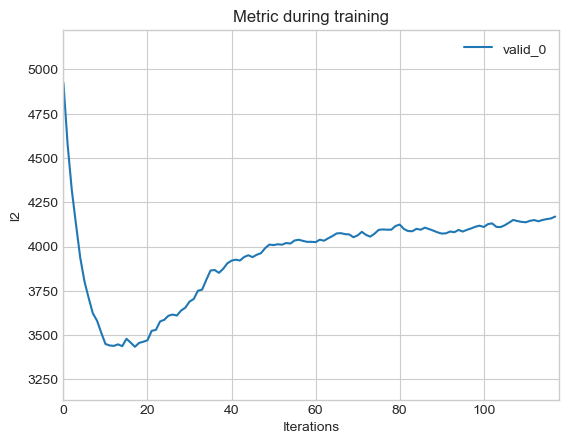

In [49]:
plot_metric(lgbmr);

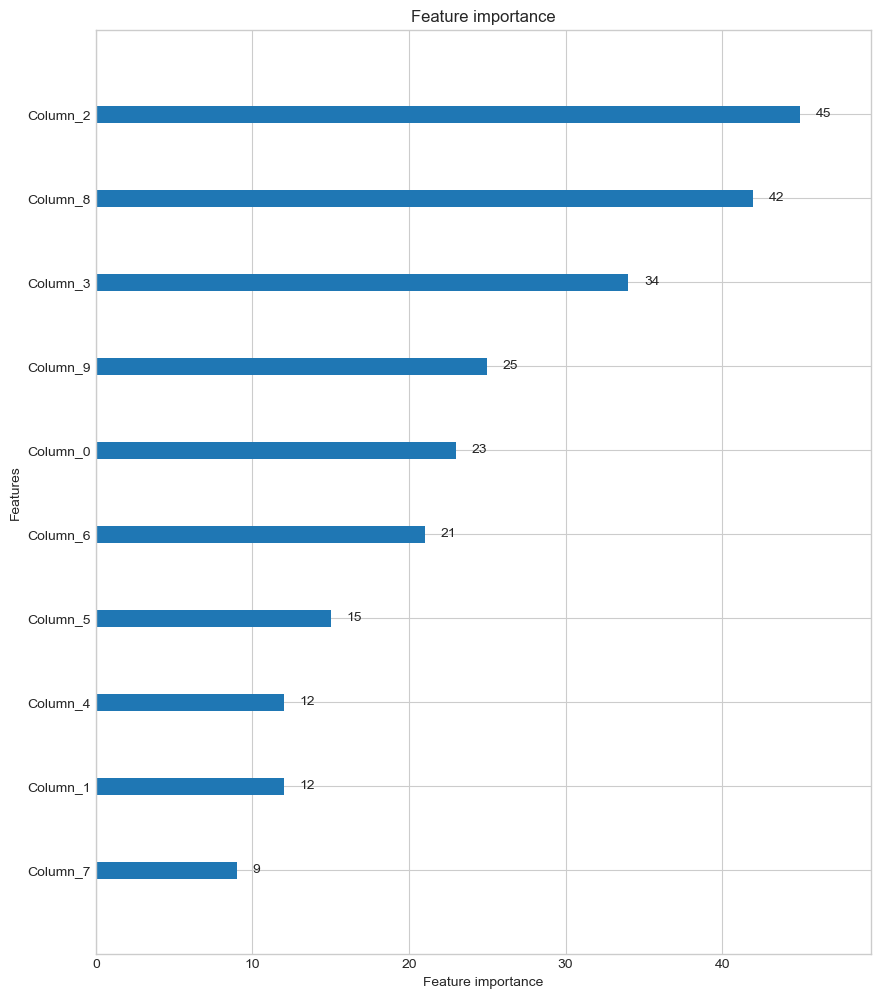

In [50]:
plot_importance(lgbmr, figsize=(10, 12));